In [ ]:
import os
import re
import wave
import hashlib
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Audio

In [ ]:
MAX_NUM_WAVS_PER_CLASS = 2**27 - 1
SAMPLE_RATE = 16000
CHUNK_SIZE = 16000
MAX_AMPL = 33000
MAX_FREQ = 4000

In [ ]:
path = kagglehub.dataset_download("neehakurelli/google-speech-commands")

print("Path to dataset files:", path, "\n\nFiles:\n")

!ls /root/.cache/kagglehub/datasets/neehakurelli/google-speech-commands/versions/1

100%|██████████| 1.38G/1.38G [00:41<00:00, 35.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/neehakurelli/google-speech-commands/versions/1 

Files:

_background_noise_  down   happy    nine  README.md  stop	       up
bed		    eight  house    no	  right      testing_list.txt  validation_list.txt
bird		    five   left     off   seven      three	       wow
cat		    four   LICENSE  on	  sheila     tree	       yes
dog		    go	   marvin   one   six	     two	       zero


In [ ]:
def which_set(filename, validation_percentage, testing_percentage):
  base_name = os.path.basename(filename)
  hash_name = re.sub(r"_nohash_.*$", "", base_name)
  hash_name_hashed = hashlib.sha1(hash_name.encode()).hexdigest()
  percentage_hash = ((int(hash_name_hashed, 16) %
                      (MAX_NUM_WAVS_PER_CLASS + 1)) *
                      (100.0 / MAX_NUM_WAVS_PER_CLASS))

  if percentage_hash < validation_percentage:
    result = "validation"

  elif percentage_hash < (testing_percentage + validation_percentage):
    result = "testing"

  else:
    result = "training"

  return result


def load_data(path, classes, validation_percentage=10, testing_percentage=10):
  data = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if not label in classes or not os.path.isdir(label_path):
      continue

    for file_name in os.listdir(label_path):
      if file_name.endswith(".wav"):
        file_path = os.path.join(label_path, file_name)
        category = which_set(file_name, validation_percentage, testing_percentage)

        data.append({
            "File_path": file_path,
            "Label": label,
            "Set": category
        })

  return pd.DataFrame(data)


classes = [x for x in os.listdir(path) if (x[0].islower() or x[0] == "_") and not ".txt" in x]
df = load_data(path, classes)
print(df.head())

training_data = df[df["Set"] == "training"]
testing_data = df[df["Set"] == "testing"]
validation_data = df[df["Set"] == "validation"]

print("\nTraining samples:", len(training_data))
print("Testing samples:", len(testing_data))
print("Validation samples:", len(validation_data))

                                           File_path Label         Set
0  /root/.cache/kagglehub/datasets/neehakurelli/g...   bed    training
1  /root/.cache/kagglehub/datasets/neehakurelli/g...   bed    training
2  /root/.cache/kagglehub/datasets/neehakurelli/g...   bed  validation
3  /root/.cache/kagglehub/datasets/neehakurelli/g...   bed    training
4  /root/.cache/kagglehub/datasets/neehakurelli/g...   bed    training

Training samples: 51094
Testing samples: 6835
Validation samples: 6798


Label: bed 




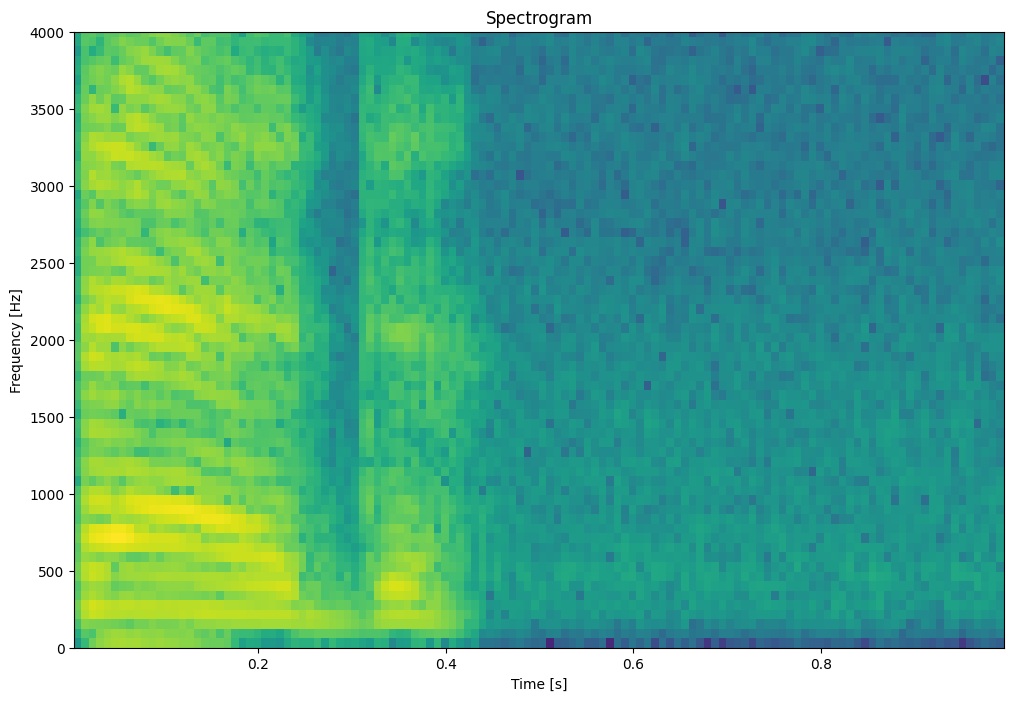

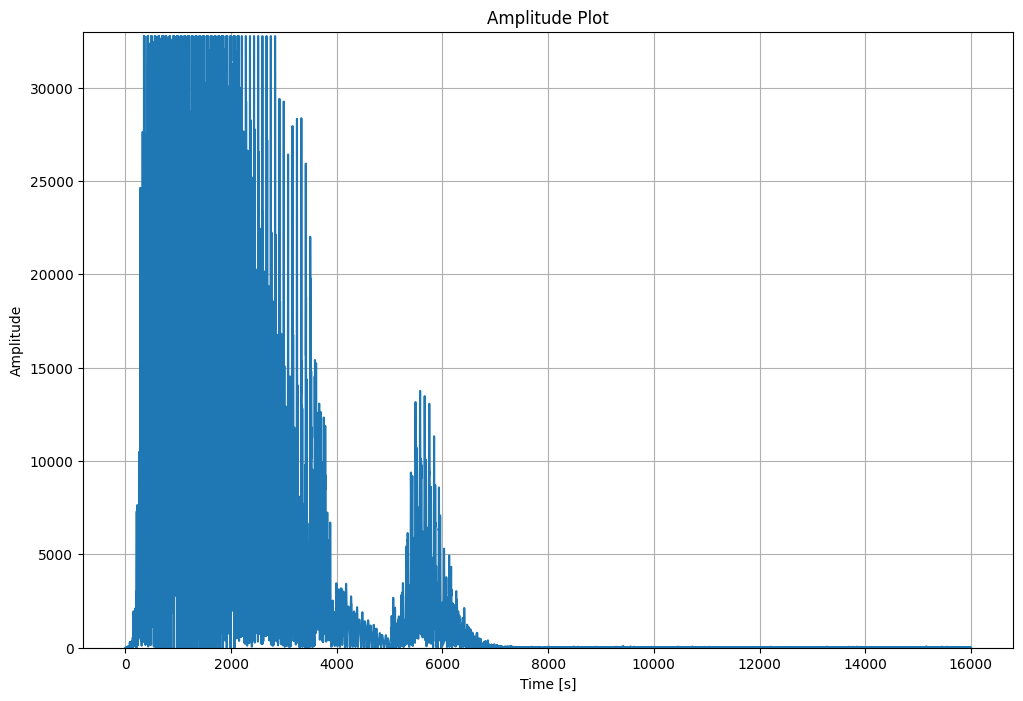

In [ ]:
def plot_spectrogram(data):
  fig, ax = plt.subplots(figsize=(12, 8))

  ax.specgram(data, Fs=SAMPLE_RATE)
  ax.set_title("Spectrogram")
  ax.set_xlabel("Time [s]")
  ax.set_ylabel("Frequency [Hz]")
  ax.set_ylim(0, MAX_FREQ)

  plt.show()


def plot_amplitude(data):
  fig, ax = plt.subplots(figsize=(12, 8))

  ax.plot(np.abs(data))
  ax.set_title("Amplitude Plot")
  ax.set_xlabel("Time [s]")
  ax.set_ylabel("Amplitude")
  ax.set_ylim(0, MAX_AMPL)
  ax.grid()

  plt.show()


idx = 400 # [200, 5000, 400]
file_path = training_data.iloc[idx]["File_path"]
label = training_data.iloc[idx]["Label"]
audio = None

with wave.open(file_path, "r") as wav_file:
  # sample_rate = wav_file.getframerate()
  # n_frames = wav_file.getnframes()
  # print(sample_rate, n_frames)

  audio = wav_file.readframes(CHUNK_SIZE)
  audio = np.frombuffer(audio, dtype=np.int16)

print("Label:", label, "\n\n")
plot_spectrogram(audio)
print("\n")
plot_amplitude(audio)
print("\n")
Audio(file_path)

In [ ]:
# TODO:
# - Sieć konwolucyjna
# - Pętla trenująca
# - Analiza procesu uczenia

# Opcjonalne:
# - Augmentacja
# - Filtrowanie